<h1>Airline Review Analysis</h1>

In [47]:
# importing lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from wordcloud import WordCloud

In [2]:
# Read data
df = pd.read_csv('Dataset/BA_AirlineReviews.csv')
print(df.shape)

(3701, 20)


In [3]:
df.head()

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [4]:
df.columns

Index(['Unnamed: 0', 'OverallRating', 'ReviewHeader', 'Name', 'Datetime',
       'VerifiedReview', 'ReviewBody', 'TypeOfTraveller', 'SeatType', 'Route',
       'DateFlown', 'SeatComfort', 'CabinStaffService', 'GroundService',
       'ValueForMoney', 'Recommended', 'Aircraft', 'Food&Beverages',
       'InflightEntertainment', 'Wifi&Connectivity'],
      dtype='object')

<h1>Data Processing</h1>

In [5]:
#renaming column to ID
df.rename(columns={"Unnamed: 0": "Id"}, inplace=True)
df.columns

Index(['Id', 'OverallRating', 'ReviewHeader', 'Name', 'Datetime',
       'VerifiedReview', 'ReviewBody', 'TypeOfTraveller', 'SeatType', 'Route',
       'DateFlown', 'SeatComfort', 'CabinStaffService', 'GroundService',
       'ValueForMoney', 'Recommended', 'Aircraft', 'Food&Beverages',
       'InflightEntertainment', 'Wifi&Connectivity'],
      dtype='object')

In [6]:
df.describe()

,Id,OverallRating,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Food&Beverages,InflightEntertainment,Wifi&Connectivity
count,3701.000000,3696.000000,3585.000000,3574.000000,2855.000000,3700.000000,3315.000000,2551.000000,609.000000
mean,1850.000000,4.734307,2.875314,3.254057,2.784238,2.688378,2.713122,2.646021,1.924466
std,1068.531001,3.175306,1.362081,1.489709,1.457058,1.471887,1.437092,1.398509,1.352705
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,925.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1850.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
75%,2775.000000,8.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,3700.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
df.isnull().sum()

Id                          0
OverallRating               5
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                 778
SeatComfort               116
CabinStaffService         127
GroundService             846
ValueForMoney               1
Recommended                 0
Aircraft                 1779
Food&Beverages            386
InflightEntertainment    1150
Wifi&Connectivity        3092
dtype: int64

The missing values dont are not seen in the ReviewBody and OverallRating which are more important fields

We split the data columns for the ease of further analysis

In [8]:
# sentimentral analysis and word cloud
df_1 = df[['Id', 'OverallRating', 'ReviewHeader', 'Datetime',
       'VerifiedReview', 'ReviewBody']]

# Analize numerical values
df_2 = df[['Id', 'OverallRating',
       'TypeOfTraveller', 'SeatType', 'Route', 'SeatComfort', 'CabinStaffService', 'GroundService',
       'ValueForMoney', 'Recommended', 'Aircraft', 'Food&Beverages',
       'InflightEntertainment', 'Wifi&Connectivity']]

<h3>Prepareing df_1 for Analysis</h3>

In [9]:
df_1.isnull().sum()

Id                0
OverallRating     5
ReviewHeader      0
Datetime          0
VerifiedReview    0
ReviewBody        0
dtype: int64

In [10]:
df_1.dropna(inplace=True)

C:\Users\anshu\AppData\Local\Temp\ipykernel_12892\871821986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.dropna(inplace=True)


In [11]:
df_1.isnull().sum()

Id                0
OverallRating     0
ReviewHeader      0
Datetime          0
VerifiedReview    0
ReviewBody        0
dtype: int64

In [12]:
# remove St, nd, rd from date
def stripDate(date_str):
    return date_str.replace('st', '').replace('nd', '').replace('rd', '').replace('th', '')

In [13]:
# ix month name in date
month_mapping = {
    'Augu': 'August',
}

def makeDate(date_str):
    for month_abbr, month_full in month_mapping.items():
        if month_abbr in date_str:
            date_str = date_str.replace(month_abbr, month_full)
            break
    return datetime.strptime(date_str, "%d %B %Y")

In [14]:
df['Datetime'] = df['Datetime'].apply(stripDate)

In [15]:
df['Datetime'] = df['Datetime'].apply(makeDate)

<h3>Prepareing df_2 for Analysis</h3>

In [16]:
df_2.isnull().sum()

Id                          0
OverallRating               5
TypeOfTraveller           771
SeatType                    2
Route                     775
SeatComfort               116
CabinStaffService         127
GroundService             846
ValueForMoney               1
Recommended                 0
Aircraft                 1779
Food&Beverages            386
InflightEntertainment    1150
Wifi&Connectivity        3092
dtype: int64

Dropping columns "Wifi&Connectivity", "Aircraft", "InflightEntertainment" since most of the values are blank

And dropping rest of the NA values

In [17]:
df_2 = df_2.drop(columns=["Wifi&Connectivity", "Aircraft", "InflightEntertainment"])
df_2.dropna(inplace=True)
df_2.isnull().sum()

Id                   0
OverallRating        0
TypeOfTraveller      0
SeatType             0
Route                0
SeatComfort          0
CabinStaffService    0
GroundService        0
ValueForMoney        0
Recommended          0
Food&Beverages       0
dtype: int64

In [18]:
df_2.shape

(2531, 11)

<h1>EDA</h1>

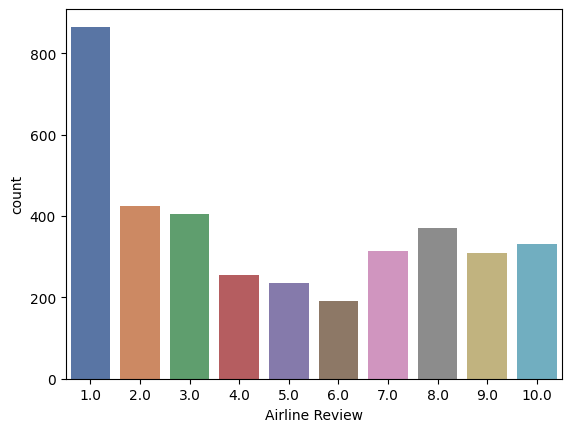

In [19]:
# overall rating plot
sns.countplot(data=df_1, x='OverallRating', hue='OverallRating', palette='deep', legend=False)
plt.xlabel('Airline Review')
plt.show()

we can observe that the data is skewed to the left indicating that there are more low rating reviews given to the Airline 

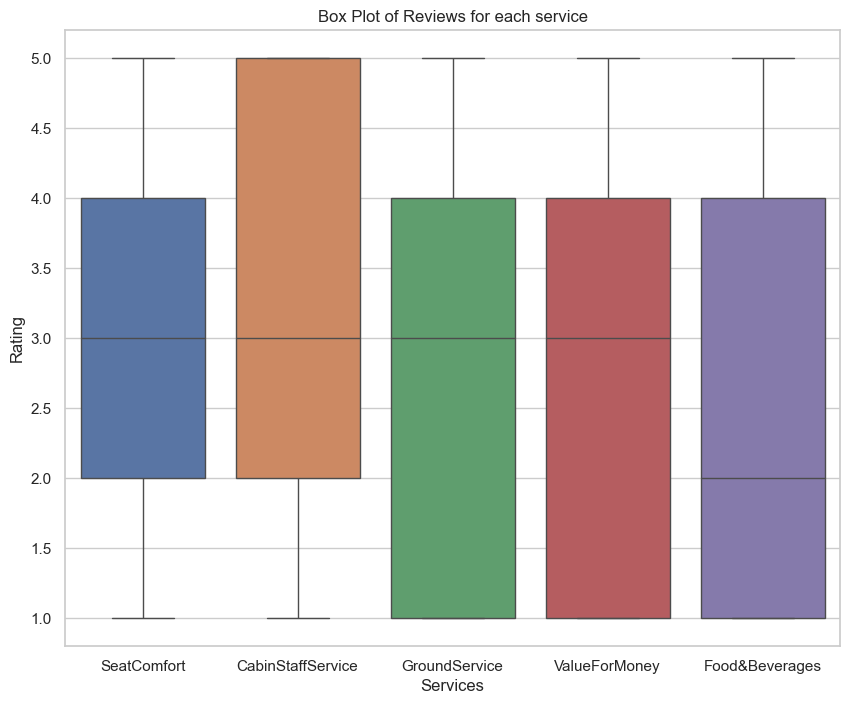

In [21]:
# plotting the services vs rating in a boxplot to observe the spread of the ratings
df_boxplt = df_2[[ 'SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney', 'Food&Beverages']]

sns.set(style='whitegrid')

plt.figure(figsize=(10, 8)) 
sns.boxplot(data=df_boxplt, palette='deep')
plt.xlabel('Services')
plt.ylabel('Rating')
plt.title('Box Plot of Reviews for each service')

plt.show()

* We can see that the median of 'SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney' is above 2.5 i.e. most people found the service above average for the the following services.
* For 'SeatComfort', 'GroundService', 'ValueForMoney', 'Food&Beverages' the 75th persentile are around 4.0 and max is at 5.0 this shows some good response
* On the other hand when we look at the 25th percentile for 'GroundService', 'ValueForMoney', 'Food&Beverages' it is with the minimum rating at 1.0

From the above plot we can observe that few people have a good feedback(3.5 - 5) for the 'SeatComfort', 'CabinStaffService' with the majority of people around the average rating(2 - 3.5).

Where as for the 'GroundService', 'ValueForMoney', 'Food&Beverages' perople overall have a negative feedback for the services(1 - 3.5/4)

In [22]:
# plot seperate graphs for verified and non verified users to see if there is any bias
df_verified = df_1[df_1["VerifiedReview"] == True]
df_nonverified = df_1[df_1["VerifiedReview"] == False]

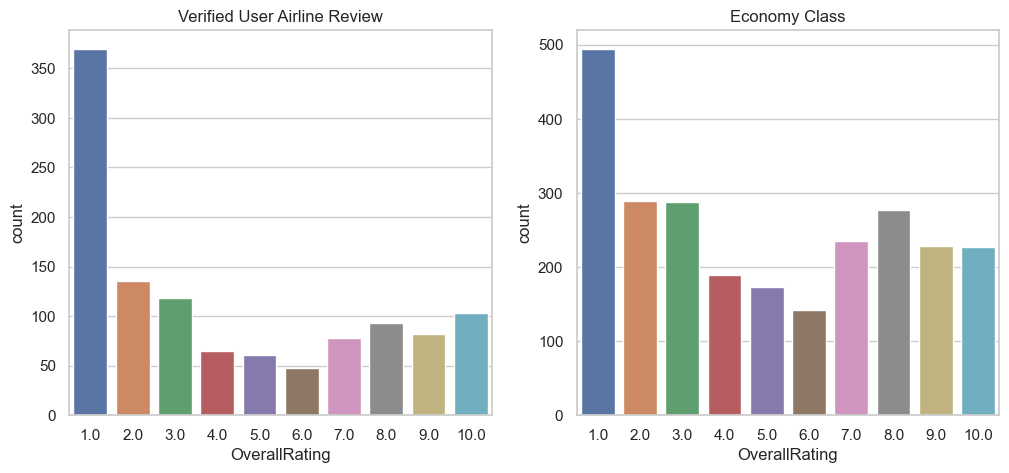

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# plot for verified users
sns.countplot(data=df_verified, x='OverallRating', hue='OverallRating', ax = axs[0], palette='deep', legend=False)
axs[0].set_title("Verified User Airline Review")

# plot for non-verified users
sns.countplot(data=df_nonverified, x='OverallRating', hue='OverallRating', ax = axs[1], palette='deep', legend=False)
axs[1].set_title("Economy Class")

plt.show()

we can see that the skewness of data is more evident in the case of verified users but there is also slighr skewness in case of non verified users

So we can conclude that there is no evident bias in the data based on user status

In [24]:
# plot seperate graphs for different seat types to see if there is any bias
df_economy = df_2[df_2["SeatType"] == 'Economy Class']
df_business = df_2[df_2["SeatType"] == 'Business Class']
df_premium = df_2[df_2["SeatType"] == 'Premium Economy']
df_first = df_2[df_2["SeatType"] == 'First Class']

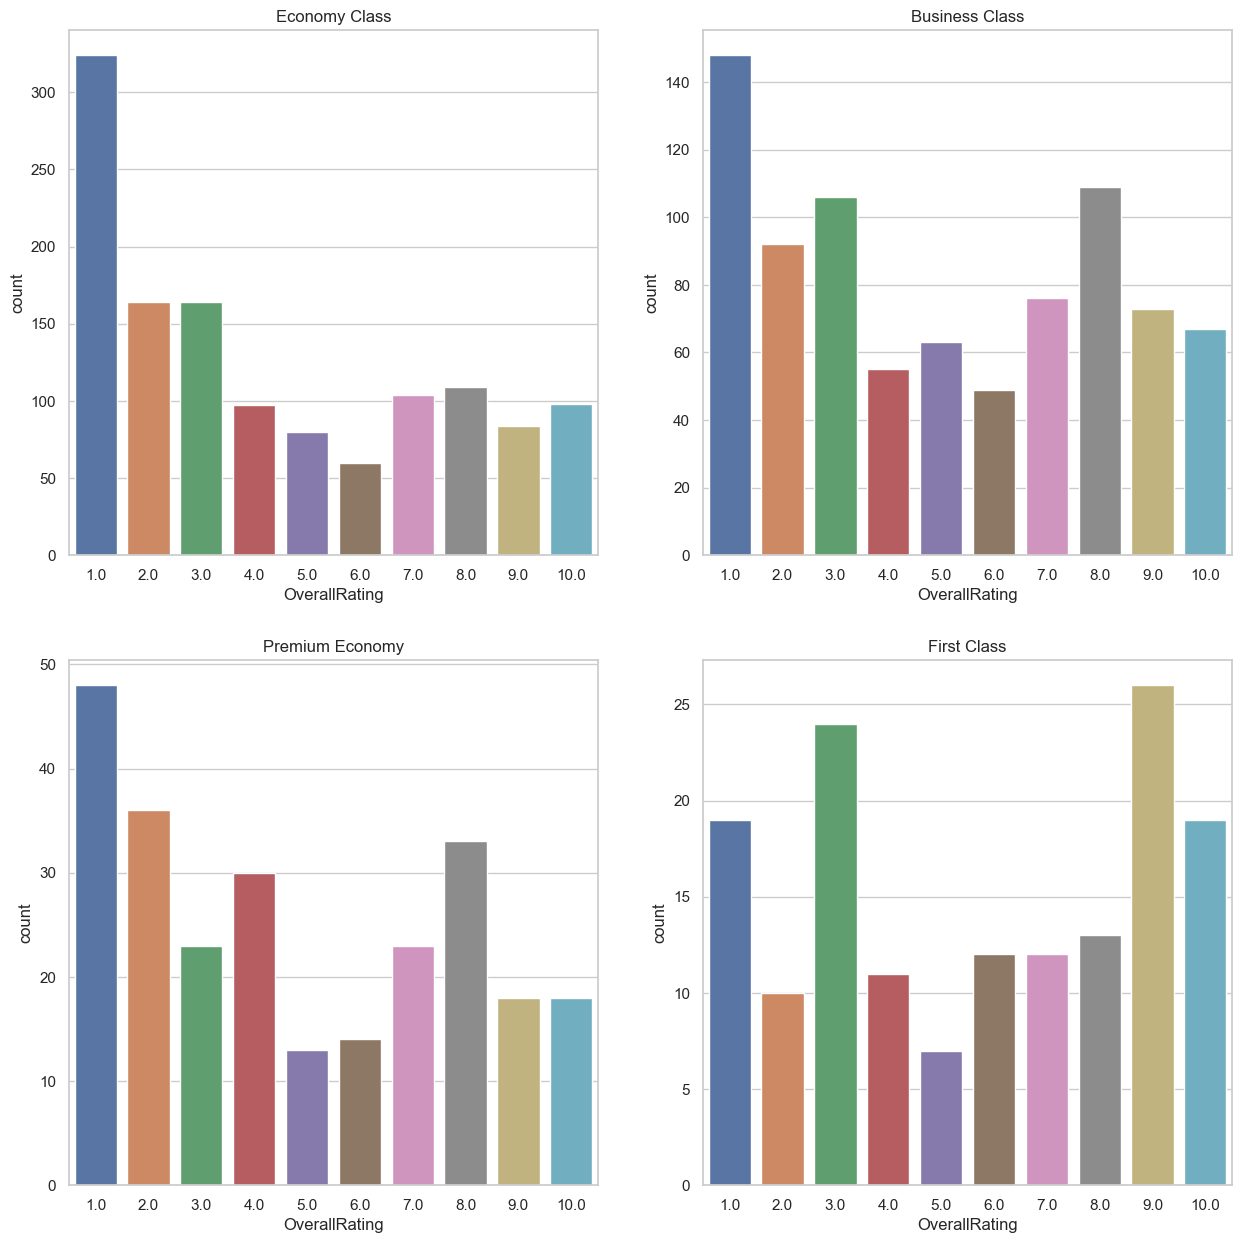

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# plot for Economy Class
sns.countplot(data=df_economy, x='OverallRating', hue='OverallRating', palette='deep', ax = axs[0][0], legend=False)
axs[0][0].set_title("Economy Class")

# plot for Business Class
sns.countplot(data=df_business, x='OverallRating', hue='OverallRating', palette='deep', ax = axs[0][1], legend=False)
axs[0][1].set_title("Business Class")

# plot for Premium Economy
sns.countplot(data=df_premium, x='OverallRating', hue='OverallRating', palette='deep', ax = axs[1][0], legend=False)
axs[1][0].set_title("Premium Economy")


# plot for First Class
sns.countplot(data=df_first, x='OverallRating', hue='OverallRating', palette='deep', ax = axs[1][1], legend=False)
axs[1][1].set_title("First Class")

plt.show()

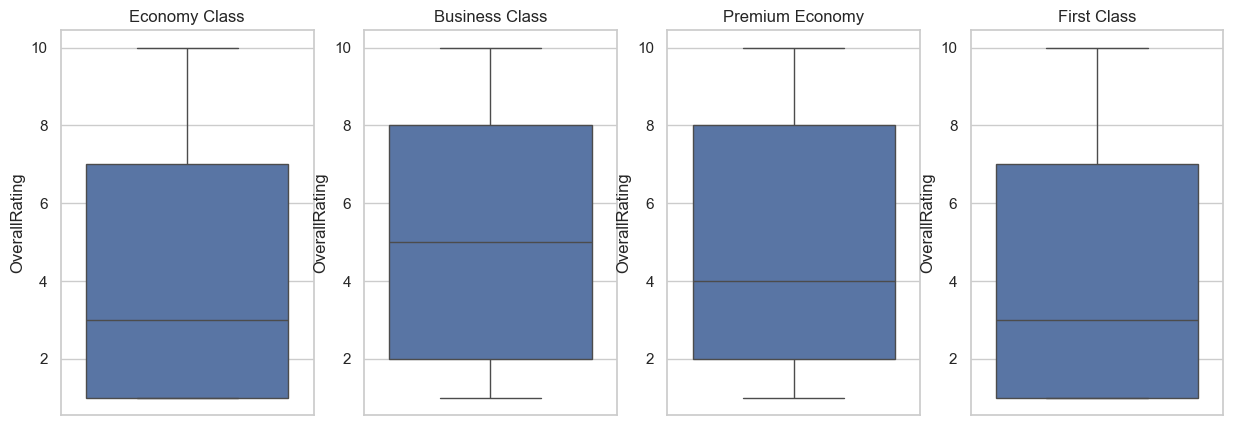

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [26]:
# plotting the boxplot for rating in each class
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

sns.set(style='whitegrid')

# Economy Class
plt.figure(figsize=(10, 8)) 
sns.boxplot(data=df_economy['OverallRating'], ax = axs[0])
axs[0].set_title('Economy Class')

# Business Class
plt.figure(figsize=(10, 8)) 
sns.boxplot(data=df_business['OverallRating'], ax = axs[1])
axs[1].set_title('Business Class')

# Premium Economy
plt.figure(figsize=(10, 8)) 
sns.boxplot(data=df_premium['OverallRating'], ax = axs[2])
axs[2].set_title('Premium Economy')

# First Class
plt.figure(figsize=(10, 8)) 
sns.boxplot(data=df_economy['OverallRating'], ax = axs[3])
axs[3].set_title('First Class')

plt.show()


df_economy = df_2[df_2["SeatType"] == 'Economy Class']
df_business = df_2[df_2["SeatType"] == 'Business Class']
df_premium = df_2[df_2["SeatType"] == 'Premium Economy']
df_first = df_2[df_2["SeatType"] == 'First Class']

From the above 2 plots it can be observed that 'Premium Economy' and 'Business Class' have a rating ranging from low-average to moderate. whereas the users from 'First Class' and 'Economy Class' have a rating ranging from low to average.

<Axes: xlabel='Recommended', ylabel='count'>

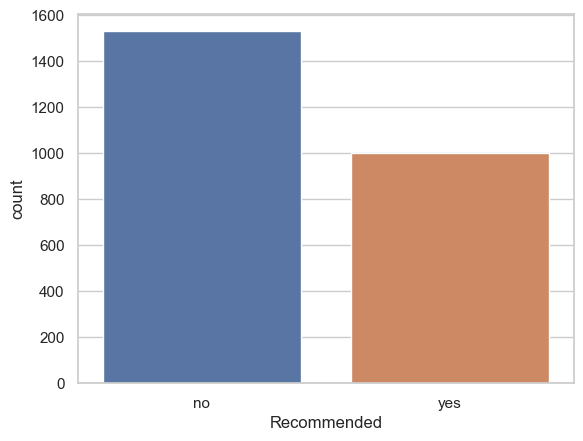

In [27]:
sns.countplot(data=df_2, x='Recommended', hue='Recommended')

# Sentiment Analysis

Roberta Pretrained Model
* Use a model trained of a large data* Transformer model accounts foe context relate  word.

In [28]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

from tqdm.notebook import tqdm

In [29]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment" # pre-trained model on twitter data
tokenizer = AutoTokenizer.from_pretrained(MODEL) # tokenizer fro the pre-trained model
model = AutoModelForSequenceClassification.from_pretrained(MODEL)  # load the pre-trained model

In [30]:
# function to take in a text input and return the scores
def polarity_scores(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'neg' : scores[0],
        'neu' : scores[1],
        'pos' : scores[2]
    }
    return scores_dict

In [31]:
df_1.head()

,Id,OverallRating,ReviewHeader,Datetime,VerifiedReview,ReviewBody
0,0,1.0,"""Service level far worse then Ryanair""",19th November 2023,True,4 Hours before takeoff we received a Mail stat...
1,1,3.0,"""do not upgrade members based on status""",19th November 2023,True,I recently had a delay on British Airways from...
2,2,8.0,"""Flight was smooth and quick""",16th November 2023,False,"Boarded on time, but it took ages to get to th..."
3,3,1.0,"""Absolutely hopeless airline""",16th November 2023,True,"5 days before the flight, we were advised by B..."
4,4,1.0,"""Customer Service is non existent""",14th November 2023,False,"We traveled to Lisbon for our dream vacation, ..."


From the head values we can see that row 0 is negative review and row 2 is a posative review. lets test our function using the values

In [32]:
# negative review
nh = df_1["ReviewHeader"][0]
nb = df_1["ReviewBody"][0]

# positive review
ph = df_1["ReviewHeader"][2]
pb = df_1["ReviewBody"][2]

In [33]:
# scores for values 
print("Negative review header :", polarity_scores(nh))
print("Negative review body :", polarity_scores(nb))
print("Positive review header :", polarity_scores(ph))
print("Positive review body :", polarity_scores(pb))


Negative review header : {'neg': 0.9159303, 'neu': 0.07640017, 'pos': 0.007669578}
Negative review body : {'neg': 0.893498, 'neu': 0.09517482, 'pos': 0.011327201}
Positive review header : {'neg': 0.013032676, 'neu': 0.40567288, 'pos': 0.5812945}
Positive review body : {'neg': 0.03357485, 'neu': 0.24359578, 'pos': 0.72282934}


From this we can observe that the fucntion polarity_scores is doing a good job on sample data 

lets apply this to entire data set 

In [34]:
res = {}
for i, row in tqdm(df_1.iterrows(), total=len(df_1)):
    try:
        text = row['ReviewBody']
        myid = row['Id']
        result = polarity_scores(text)
        res[myid] = result
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/3696 [00:00<?, ?it/s]

Broke for id 34
Broke for id 67
Broke for id 89
Broke for id 134
Broke for id 148
Broke for id 203
Broke for id 208
Broke for id 227
Broke for id 250
Broke for id 258
Broke for id 336
Broke for id 356
Broke for id 421
Broke for id 480
Broke for id 502
Broke for id 557
Broke for id 626
Broke for id 627
Broke for id 764
Broke for id 788
Broke for id 821
Broke for id 921
Broke for id 945
Broke for id 1009
Broke for id 1021
Broke for id 1077
Broke for id 1092
Broke for id 1109
Broke for id 1114
Broke for id 1119
Broke for id 1130
Broke for id 1194
Broke for id 1200
Broke for id 1201
Broke for id 1255
Broke for id 1330
Broke for id 1359
Broke for id 1379
Broke for id 1382
Broke for id 1383
Broke for id 1387
Broke for id 1399
Broke for id 1402
Broke for id 1417
Broke for id 1437
Broke for id 1450
Broke for id 1484
Broke for id 1505
Broke for id 1506
Broke for id 1526
Broke for id 1535
Broke for id 1552
Broke for id 1594
Broke for id 1631
Broke for id 1632
Broke for id 1700
Broke for id 1741


few of the reviews were not converted to token values since the length of review was long, skipping the values for now

In [35]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df_1, how='left')

In [36]:
results_df.head()

,Id,neg,neu,pos,OverallRating,ReviewHeader,Datetime,VerifiedReview,ReviewBody
0,0,0.893498,0.095175,0.011327,1.0,"""Service level far worse then Ryanair""",19th November 2023,True,4 Hours before takeoff we received a Mail stat...
1,1,0.912927,0.078364,0.008709,3.0,"""do not upgrade members based on status""",19th November 2023,True,I recently had a delay on British Airways from...
2,2,0.033575,0.243596,0.722829,8.0,"""Flight was smooth and quick""",16th November 2023,False,"Boarded on time, but it took ages to get to th..."
3,3,0.853441,0.129987,0.016573,1.0,"""Absolutely hopeless airline""",16th November 2023,True,"5 days before the flight, we were advised by B..."
4,4,0.901762,0.086658,0.011580,1.0,"""Customer Service is non existent""",14th November 2023,False,"We traveled to Lisbon for our dream vacation, ..."


In [39]:
results_df.columns

Index(['Id', 'neg', 'neu', 'pos', 'OverallRating', 'ReviewHeader', 'Datetime',
       'VerifiedReview', 'ReviewBody'],
      dtype='object')

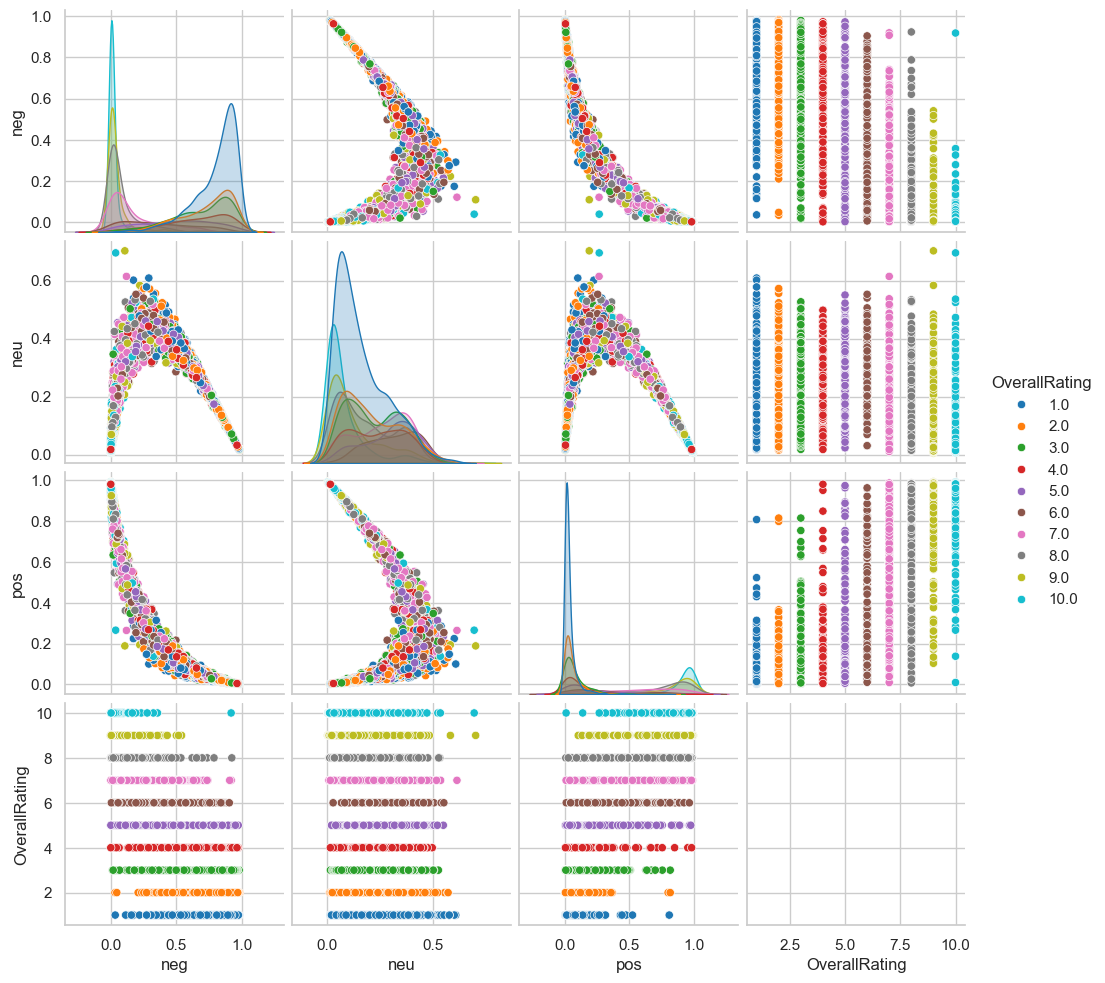

In [38]:
# lets try a pair plot to see coorealtion between columns
sns.pairplot(data=results_df,
             vars=['neg', 'neu', 'pos', 'OverallRating'],
            hue='OverallRating',
            palette='tab10')
plt.show()

* From the OverallRating vs neg we can observe that the negative score is less when the rating is close to 10
* Similarly for the OverallRating bs pos we can observe that the positive score is low for ratings close to 1 

# Word Cloud

In [40]:
# Function to remove stop words
def remove_stop_words(text, stop_words):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

In [49]:
# Function to create a word cloud
def create_word_cloud(text):
    wordcloud = WordCloud(width = 800, height = 800, 
                          background_color ='white', 
                          min_font_size = 10).generate(text)

    plt.figure(figsize = (20, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.show()

In [42]:
combined_text = ' '.join(results_df['ReviewBody'])

In [43]:
# List of stop words (customize as needed)
stop_words = set(["the", "and", "to", "of", "a", "in", "for", "is", "on", "that", "by", "this", "with", "i", "you", "it", "not", "or", "be", "are"])

In [44]:
# Remove stop words from the combined text
clean_text = remove_stop_words(combined_text, stop_words)

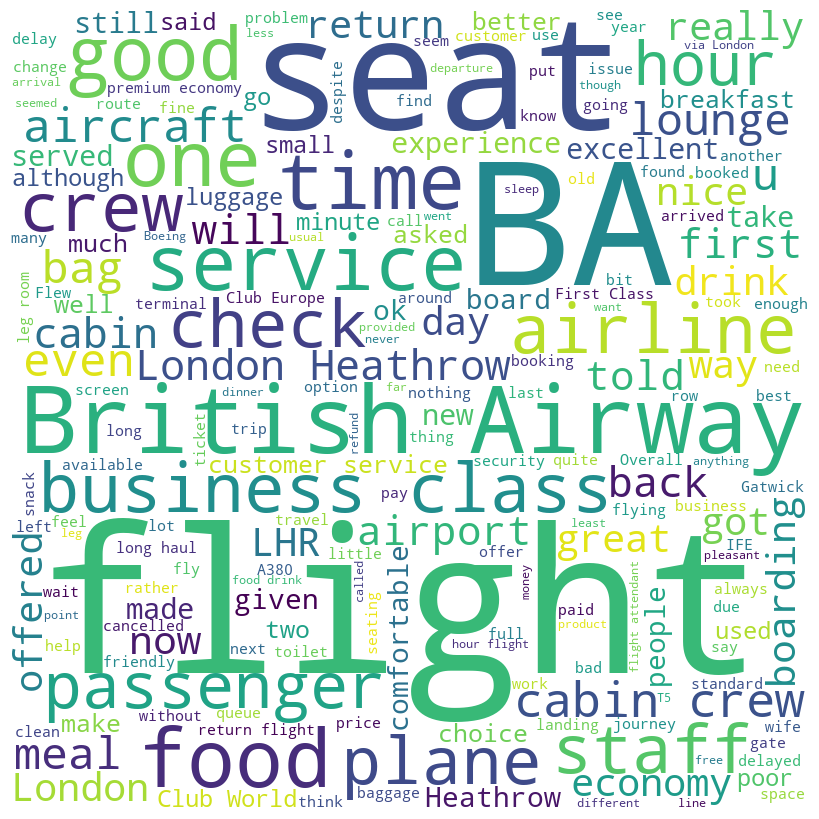

In [50]:
# Create and display the word cloud
create_word_cloud(clean_text)